In [1]:
import os
import bye_cycle
import tensorflow as tf
# Disabling tf warnings
tf.get_logger().setLevel('INFO')
from tqdm import tqdm
import numpy as np
import pickle
import matplotlib.pyplot as plt
from beep.structure.cli import auto_load_processed
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


2023-01-11 22:15:09.855124: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-11 22:15:09.856844: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-11 22:15:09.858872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-11 22:15:09.860674: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-11 22:15:09.862350: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

In [2]:
# Disabling GPU
RUN_ON_GPU = True
if not RUN_ON_GPU:
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
# # read CACHED data 
# # excluding all diagnostic cycles and those with increase in discharge cap, renumber 
# input_window_size = 50
# output_window_size = 50
# skip_window_after_diagnostic = 50
# structured_data_list = []
# summary_data_list = []
# nominal_cell_capacity = 1.1
# drop_following_diagnostic = False

# for i,cell_file in enumerate(tqdm(os.listdir('CACHED_DATA/pre_processed_pandas/LFP/'))):
#     print(i, cell_file)
#     if cell_file.startswith("Fast"):
#         with open(f'CACHED_DATA/pre_processed_pandas/LFP/{cell_file}', 'rb') as f:
#             structured_data, summary_data = pickle.load(f)
# #         a = find_renumbedred_index(structured_data)
# #         print(len(summary_data[0]))
# #         break
# #         equivalent_cycle_index = summary_data[0]['charge_throughput']/nominal_cell_capacity
# #         summary_data[0]['cycle_index'] = equivalent_cycle_index
# #         print(summary_data[0]['cycle_index'])
# #         print(len(summary_data[0]))
# #         break
#         if not drop_following_diagnostic:
#             cycle_indices_dropped = []
#         else:
#             summary_data[0], cycle_indices_dropped = decrease_monotonically(summary_data[0])
#             print(cycle_indices_dropped)
# #         print(len(summary_data[0]))
#         # getting equivalent cycle index

# #         break
# #         print(len(summary_data[0]))
# #         skipped_cycles = [list(range(m+1,m+skip_window_after_diagnostic+1)) for m in a]
# #         flatten_skipped_cycles = [x for xs in skipped_cycles for x in xs]
#         # check if the cell has enough cycles based on the $window_cycles_size
#         if len(summary_data[0]) >= input_window_size * 2:
#             cycle_list = []
#             new_cycle_indices = []
#             j = 0
#             for cycle in structured_data:
#                 if len(cycle) > 2:
#                     cycle_index_value = np.unique(cycle['cycle_index'])[0]
#                     if  cycle_index_value not in cycle_indices_dropped:
#                         cycle.loc[:,'cycle_index'] = j
#                         cycle_list.append(cycle)
#                         new_cycle_indices.append(j)
#                         j += 1
# #                 else:
# #                     print(f'TIME-SERIES THRESHOLD ALEERT FOR {i, cell_file}')
#             structured_data_list.append(cycle_list)
# #             summary_data[0][summary_data[0]['summary_data[0]'] != flatten_skipped_cycles]
# #             summary_data[0] = summary_data[0][~summary_data[0]['cycle_index'].isin(flatten_skipped_cycles)]
# #             summary_data[0]['cycle_index'] = new_cycle_indices
#             summary_data_list.append(summary_data[0])
# #             print(len(summary_data_list[i]), len(structured_data_list[i]))
#         else:
#             print(f'NUMBER OF CYCLES THRESHOLD ALEERT FOR {i, cell_file}')
# #         dat.append(cell_data)
# #     if i ==2:
# #         break
# print('CACHED data is loaded.')

In [4]:
# def index_convoluter(cell, input_window_size=20, output_window_size=20, overlap_cycle_window=False,
#                      overlap_size=5, skip_diagnostic_in_window=False):
#     '''This function generates a nested list of indices by convolting the cycles based on cycle_window_size. 
#         You can choose to have your window of cycles overlap, or skipp the windows that involve diagnostic cycles in between.
#     '''
#     max_cycle_index = len(cell) #30 #
#     print(max_cycle_index)
#     if input_window_size < overlap_size:
#         raise ValueError(f'If overlapping, overlap_size ({overlap_size}) should be samller than cycle_window_size ({input_window_size}). Please check inputs.')
#     if not input_window_size < max_cycle_index:
#         raise ValueError(f'cycle_window_size ({input_window_size}) should be samller than maximum number of cycles in cell ({max_cycle_index}). Please check inputs.')
#     if overlap_cycle_window:
#         non_overlap =  input_window_size - overlap_size
#     else:
#         non_overlap = input_window_size
#     intervals = range(0, max_cycle_index, non_overlap)
#     if not skip_diagnostic_in_window:
#         input_covolutions = [list(range(x, x + input_window_size)) for x in intervals if x <= max_cycle_index-input_window_size]
#     else:
# #         skipped_indices = [5, 6, 7, 20]
#         skipped_indices = find_renumbedred_index(cell)
#         input_covolutions = [list(range(x, x + input_window_size)) for x in intervals if x <= max_cycle_index-input_window_size
#                              and not (set(list(range(x, x + cycle_window_size))[:-1]) & set(skipped_indices))]
#     output_covolutions = [list(range(x[-1]+1, x[-1] + output_window_size +1)) for x in input_covolutions if x[-1] < max_cycle_index- output_window_size]
        
#     return input_covolutions[:len(output_covolutions)], output_covolutions

In [185]:
import pickle as pkl
input_window_size = 10
output_window_size = 10
pkl_f_l_filename = f'CACHED_DATA/pickled_cycle_windows/LFP/fearures_labels_inputs_window_{input_window_size}_outputs_window_{output_window_size}.pkl'
with open(pkl_f_l_filename, 'rb') as f:
    [cell_features, cell_labels] = pkl.load(f)  

In [186]:
import random
prepared_data = list(zip(cell_features, cell_labels))

random.seed(0)
shuffled_indices = list(range(len(prepared_data)))
random.shuffle(prepared_data)
# prepared_data = prepared_data[shuffled_indices]

train_size = 0.9
val_size = 0.2
N_train = int(train_size *len(prepared_data))
N_val = int(val_size * N_train)
train_cells = prepared_data[:N_train]
test_cells = prepared_data[N_train:]

val_cells = train_cells[:N_val]
train_cells = train_cells[N_val:]
print(len(train_cells), len(val_cells), len(test_cells), len(train_cells)+len(test_cells)+len(val_cells))

100 25 14 139


In [187]:
def scale(inputs, scaler=None):
    from sklearn import preprocessing
    inputs_shape = inputs.shape
    if scaler is None:
        scaler = preprocessing.StandardScaler().fit(inputs.reshape(-1, inputs_shape[-1]))
    scaled_input = scaler.transform(inputs.reshape(-1, inputs_shape[-1])).reshape(inputs_shape)
    return scaler, scaled_input

def rev_scale(scaled_inputs, scaler):
    scaled_inputs_shape = scaled_inputs.shape
    origin_inputs = scaler.inverse_transform(scaled_X_train_time_series.reshape(-1, scaled_inputs_shape[-1]))
    return origin_inputs.reshape(scaled_inputs_shape)



def standardize_train(inputs):
    fstd = np.std(inputs, axis=0)
    fmean = np.mean(inputs, axis=0)
    std_features = (inputs - fmean) / fstd
    return std_features, fmean, fstd

def standardize_non_train(inputs, fmean_train, fstd_train):
    std_features = (inputs - fmean_train) / fstd_train
    return std_features

def de_standardize_non_train(inputs, fmean_train, fstd_train):
    return inputs*fstd_train + fmean_train

def make_feature_arrays(data):
    X_dt_values = []
    X_time_series = []
    for X in data:
        X_dt_values.append(X[1])
        X_time_series.append(X[0])
#         break
    return np.array(X_time_series), np.array(X_dt_values)

def make_label_arrays(data):
    slopes = []
    discharge_cap = []
    for Y in data:
        discharge_cap.append(Y[1])
        slopes.append(Y[0])
    return np.array(discharge_cap), np.array(slopes)

X_train = [x for xs in train_cells for x in xs[0]]
Y_train = [x for xs in train_cells for x in xs[1]]
dc_train, slopes_train = make_label_arrays(Y_train)
X_train_time_series, X_train_dt = make_feature_arrays(X_train)

import random
random.seed(0)
indices = list(range(len(X_train_time_series)))
random.shuffle(indices)
X_train_time_series = X_train_time_series[indices]
X_train_dt = X_train_dt[indices]


slopes_train = slopes_train[indices]
dc_train = dc_train[indices]


X_val = [x for xs in val_cells for x in xs[0]]
Y_val = [x for xs in val_cells for x in xs[1]]
dc_val, slopes_val = make_label_arrays(Y_val)
X_val_time_series, X_val_dt = make_feature_arrays(X_val)

X_test = [x for xs in test_cells for x in xs[0]]
Y_test = [x for xs in test_cells for x in xs[1]]
dc_test, slopes_test = make_label_arrays(Y_test)
X_test_time_series, X_test_dt = make_feature_arrays(X_test)

f_scaler, scaled_X_train_time_series = scale(X_train_time_series[...,1:])
_ , scaled_X_val_time_series = scale(X_val_time_series[...,1:], f_scaler)
_ , scaled_X_test_time_series = scale(X_test_time_series[...,1:], f_scaler)

l_scaler, scaled_slopes_train = scale(slopes_train)
_ , scaled_slopes_val = scale(slopes_val, l_scaler)
_ , scaled_slopes_test = scale(slopes_test, l_scaler)

In [188]:
from dataclasses import dataclass
@dataclass
class Config:
    batch_size: int
    buffer_size: int
    rnn_units: int
    hidden_dim: int
    embedding_dim: int
    reg_strength: float
    lr: float
    drop_rate: float
        
config = Config(batch_size=16, 
                buffer_size=10000,
                rnn_units=64,
                hidden_dim=64,
                embedding_dim=32,
                reg_strength=0,
                lr=1e-3,
                drop_rate=0.1
               )

def build_model(L, T, cycle_window_size=10, reg_strength=0):
    inputs = tf.keras.Input(shape=(cycle_window_size,T,2))
    input_dt = tf.keras.Input(shape=(cycle_window_size))


    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 100), input_shape=(cycle_window_size, 100, 2))(inputs)

    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(config.drop_rate))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.GlobalAveragePooling1D())(x)

    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))(x)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False))(x)

    x = tf.keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.L1(l1=reg_strength), activation='tanh')(x)
    x = tf.keras.layers.LayerNormalization()(x)
    x = tf.keras.layers.Dropout(config.drop_rate)(x)
    x = tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.L1(l1=reg_strength), activation='tanh')(x)

    x = tf.keras.layers.LayerNormalization()(x)
    x = tf.keras.layers.Dropout(config.drop_rate)(x)
    yhat = tf.keras.layers.Dense(2, kernel_regularizer=tf.keras.regularizers.L1(l1=reg_strength)
                                 )(x) # activation=tf.keras.layers.LeakyReLU(alpha=0.01)
    model = tf.keras.Model(inputs=inputs, outputs=yhat)
    return model
tf.keras.backend.clear_session()
L = None
T = 100

from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 
    
# model = build_model(L, T, cycle_window_size=input_window_size, reg_strength=0)
# opt = tf.optimizers.Adam(1e-3)
# model.compile(opt, loss='mae')  #root_mean_squared_error
# #   loss='mean_absolute_error')
  
# model.summary()


In [189]:
model_file = f"../paper/CACHED_DATA/DNN/LFP/saved_models/model_window_size_inputs_window_{input_window_size}_outputs_window_{output_window_size}"
if not os.path.exists(model_file+".json"):
    print('Training')
    tf.keras.backend.clear_session()
    model = build_model(L, T, cycle_window_size=input_window_size, reg_strength=0)
    opt = tf.optimizers.Adam(1e-3)
    model.compile(opt, loss='mae')
    result = model.fit( 

        scaled_X_train_time_series, scaled_slopes_train, # standardize
        validation_data=(scaled_X_val_time_series, scaled_slopes_val), 
        callbacks=[tf.keras.callbacks.ReduceLROnPlateau(
                monitor="val_loss", factor=0.9, patience=5, min_lr=1e-5
            ), tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=20)],
        epochs=200, batch_size=32, verbose=0)
    model_json = model.to_json()
    with open(model_file+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(model_file+".h5")
    plt.figure(dpi=100, facecolor='white')
    plt.plot(result.history['loss'], color='C0', label='Train')
    plt.plot(result.history['val_loss'], color='C1', label='Validation')
    plt.legend()
    plt.ylabel('MAE')
    plt.xlabel('Epochs')
    plt.title(f'Input: {input_window_size}, Prediction: {output_window_size}')
    plt.savefig(f'CACHED_DATA/DNN/LFP/img/loss/loss_{input_window_size}_out_{output_window_size}_window.png', dpi=400, transparent=False)
    plt.close()

else:
    json_file = open(model_file+'.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = tf.keras.models.model_from_json(loaded_model_json)
    # load weights into new model
    model.load_weights(model_file+".h5")
    print('loaded_model')
opt = tf.optimizers.Adam(1e-3)
model.compile(opt, loss='mae')  

loaded_model


In [190]:
# # result = model.fit(
# #     scaled_X_train_time_series, -np.log(-balanced_slopes_train), # standardize
# # #     scaled_X_train_time_series, balanced_slopes_train,
# #     validation_data=(scaled_X_val_time_series, -np.log(-slopes_val)), 
# # #     validation_data=(scaled_X_val_time_series, slopes_val), 
# #     callbacks=[tf.keras.callbacks.ReduceLROnPlateau(
# #             monitor="val_loss", factor=0.9, patience=5, min_lr=1e-5
# #         ), tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=10)],
# # # #         tf.keras.callbacks.LambdaCallback(
# # # #         on_epoch_begin=lambda epochs,logs: print('lr =',lr_decayed_fn(opt.iterations).numpy())
# # # #         ),
# # #         ,
# #     epochs=150, batch_size=16)

# result = model.fit( 
# #     balanced_X_train_time_series, balanced_slopes_train, # standardize

#     scaled_X_train_time_series, scaled_slopes_train, # standardize
#     validation_data=(scaled_X_val_time_series, scaled_slopes_val), 
#     callbacks=[tf.keras.callbacks.ReduceLROnPlateau(
#             monitor="val_loss", factor=0.9, patience=5, min_lr=1e-5
#         ), tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=20)],
# # #         tf.keras.callbacks.LambdaCallback(
# # #         on_epoch_begin=lambda epochs,logs: print('lr =',lr_decayed_fn(opt.iterations).numpy())
# # #         ),
# #         ,
#     epochs=200, batch_size=32, verbose=1)

In [191]:
# plt.figure(dpi=100, facecolor='white')
# plt.plot(result.history['loss'], color='C0', label='Train')
# plt.plot(result.history['val_loss'], color='C1', label='Validation')
# plt.legend()
# plt.ylabel('MAE')
# plt.xlabel('Epochs')

In [192]:
slope_mae = model.evaluate(scaled_X_test_time_series, scaled_slopes_test)
Y_hat_test = model.predict(scaled_X_test_time_series)
Y_hat_test = l_scaler.inverse_transform(Y_hat_test)

29/29 [==============================] - 2s 4ms/step


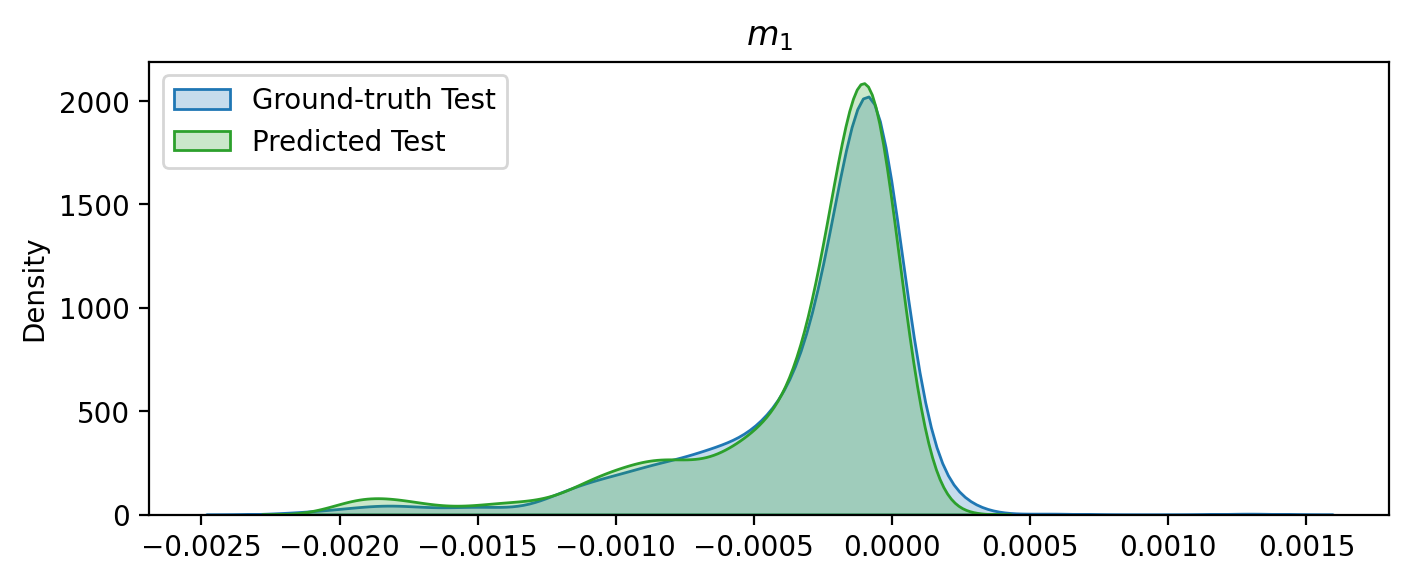

In [193]:
import seaborn as sns
fig, ax = plt.subplots(1, dpi=200, figsize=(8,3), facecolor='white')
sns.kdeplot(slopes_test[:,0], alpha=0.25, label='Ground-truth Test', color='C0', fill=True)
sns.kdeplot(Y_hat_test[:,0],  alpha=0.25, label='Predicted Test', color='C2', fill=True)
ax.set_title(r'$m_1$')
plt.legend(loc='upper left')
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()

In [194]:
np.set_printoptions(precision=10)

In [195]:
# testing on data
test_cell_number = 1
tested_cell = [test_cells[test_cell_number]]

X_tested_cell = [x for cycle in tested_cell for x in cycle[0]]
Y_tested_cell = [y for cycle in tested_cell for y in cycle[1]]
dc_tested_cell, slopes_tested_cell = make_label_arrays(Y_tested_cell)
X_tested_cell_time_series, X_tested_cell_dt = make_feature_arrays(X_tested_cell)

all_test_slopes = [y[0] for y in Y_tested_cell]
all_test_dc = np.array([y[1] for y in Y_tested_cell])

_, scaled_X_tested_cell_time_series = scale(X_tested_cell_time_series[...,1:], f_scaler)
Y_hat_tested_cell = model.predict(scaled_X_tested_cell_time_series)
Y_hat_tested_cell = l_scaler.inverse_transform(Y_hat_tested_cell)


3/3 [==============================] - 0s 4ms/step


In [196]:
start_dc = np.max(all_test_dc.reshape([-1,2])[:,1])
cut_off = 0.98
cut_off_dc = start_dc * cut_off
cut_off_dc

1.076009228

In [197]:
np.where(int(m[0,0] - output_window_size) == all_test_dc.reshape([-1,2])[:,0])

(array([431]),)

In [198]:
all_test_dc.reshape([-1,2])[:,0]

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100., 101., 102., 103., 104., 105., 106., 107., 108.,
       109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
       120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130.,
       131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141.,
       142., 143., 144., 145., 146., 147., 148., 149., 150., 151., 152.,
       153., 154., 155., 156., 157., 158., 159., 16

In [199]:
all_test_dc.reshape([-1,2])[:,0]

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100., 101., 102., 103., 104., 105., 106., 107., 108.,
       109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
       120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130.,
       131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141.,
       142., 143., 144., 145., 146., 147., 148., 149., 150., 151., 152.,
       153., 154., 155., 156., 157., 158., 159., 16

In [200]:
m[0,0]

451.0

In [201]:
int(m[0,0] - input_window_size)

441

/tmp/ipykernel_21450/439628307.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(dpi=100, facecolor='white')


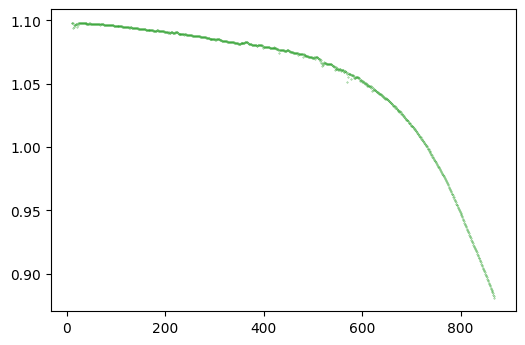

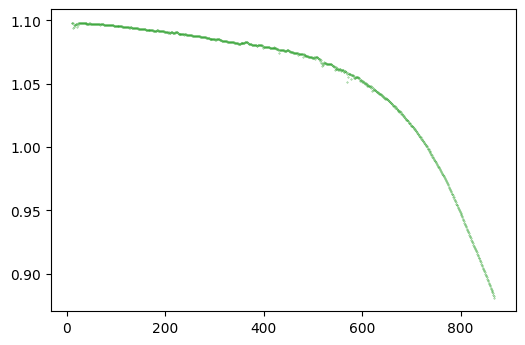

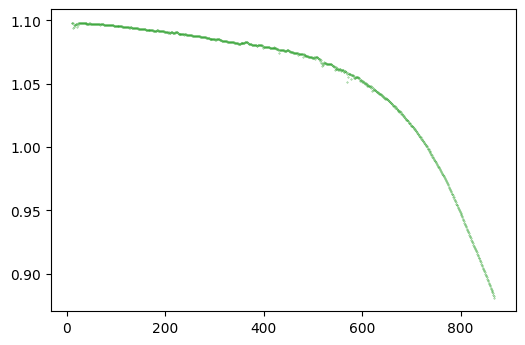

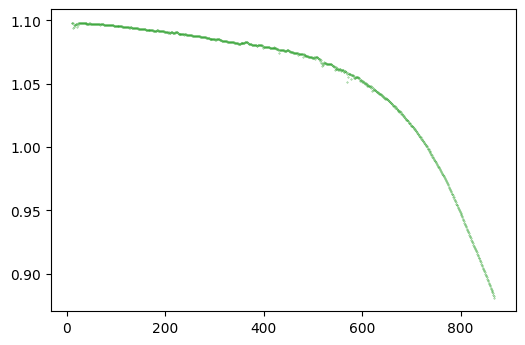

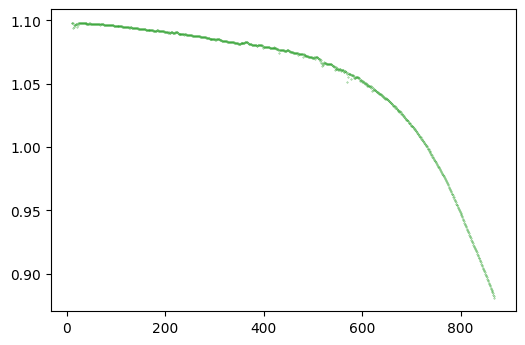

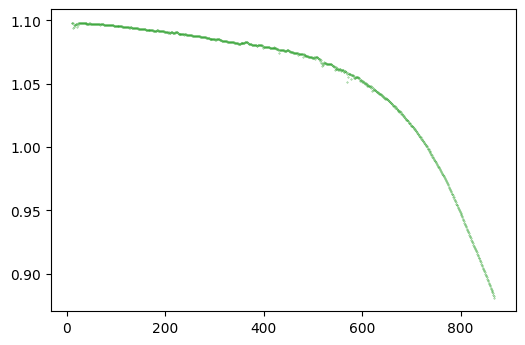

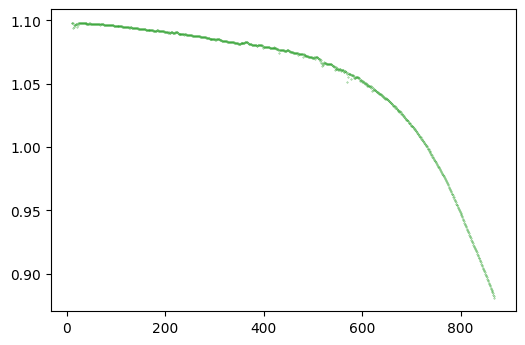

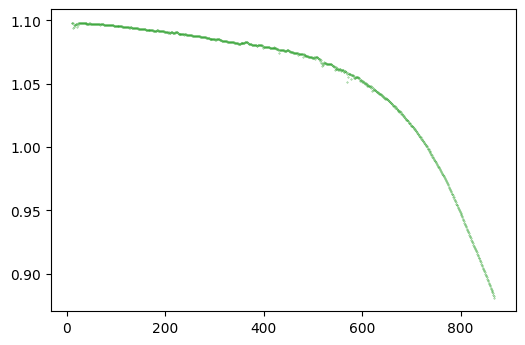

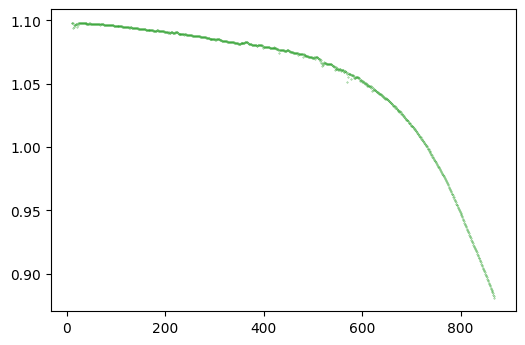

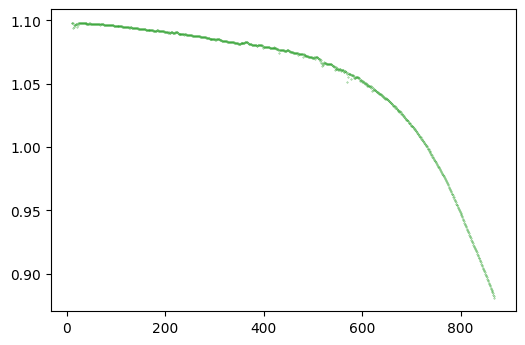

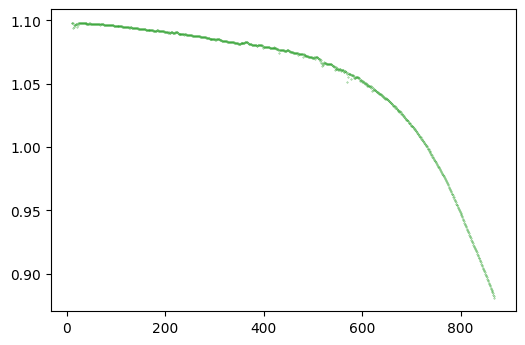

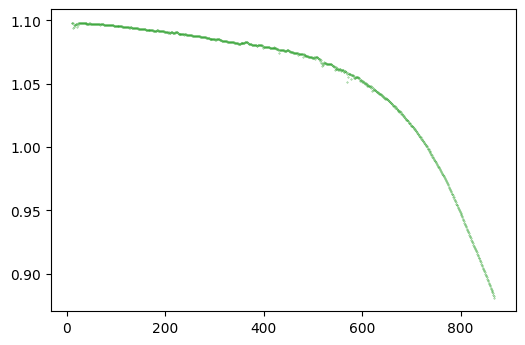

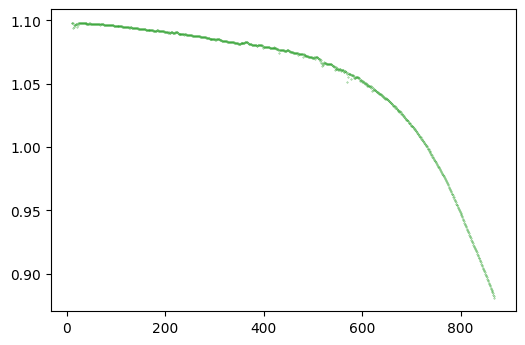

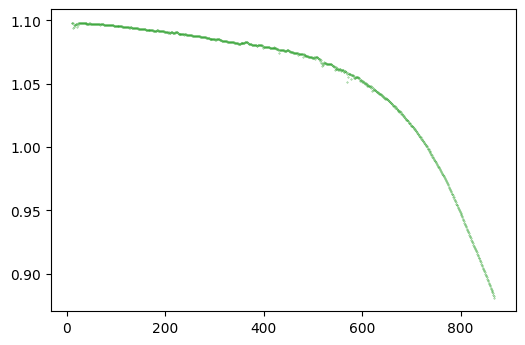

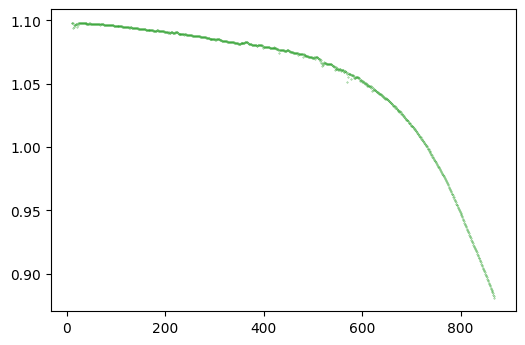

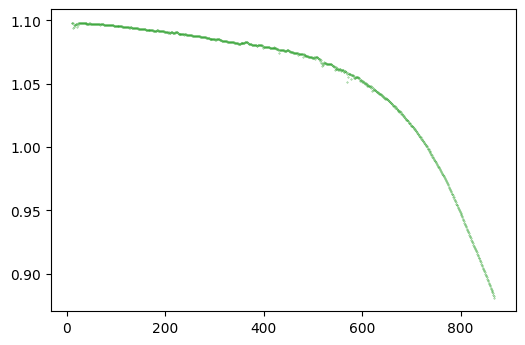

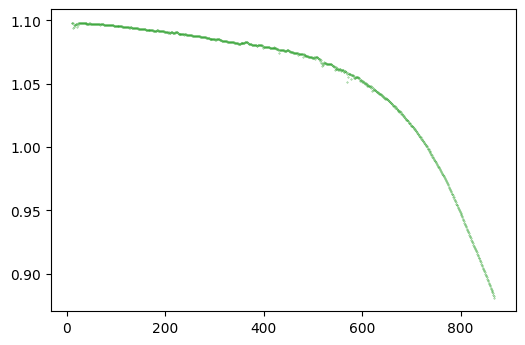

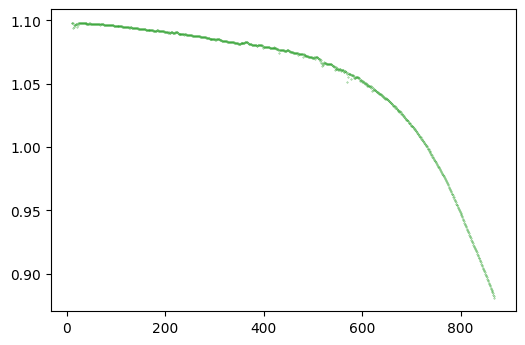

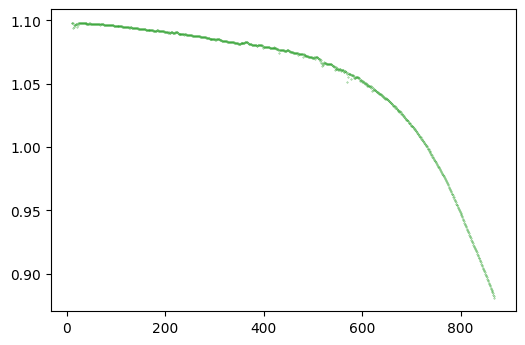

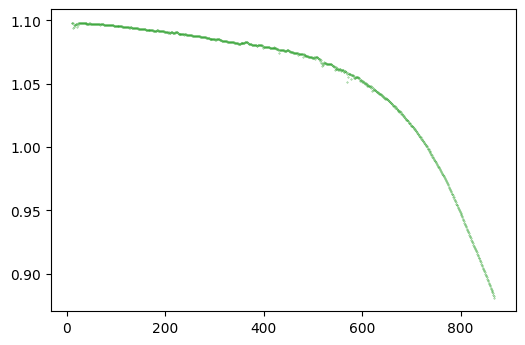

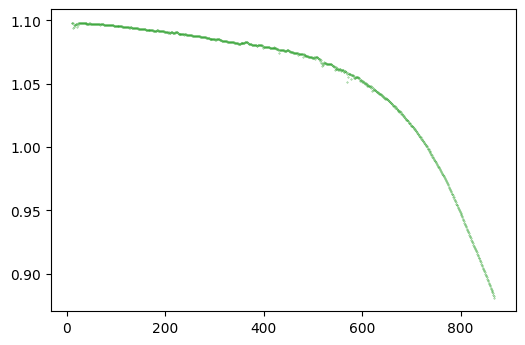

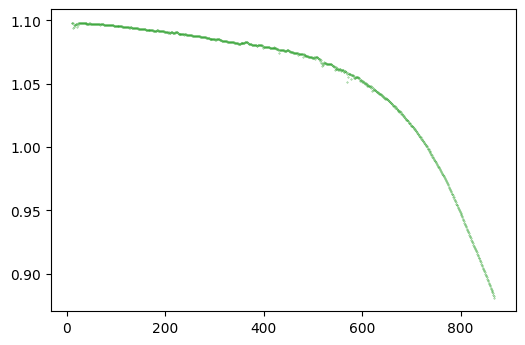

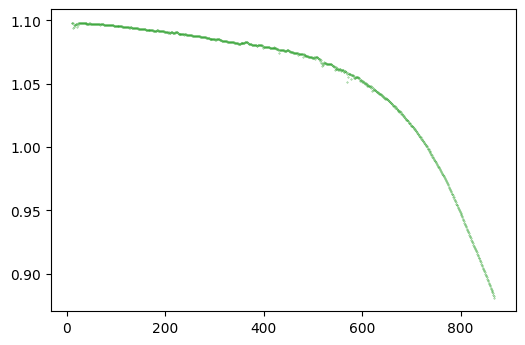

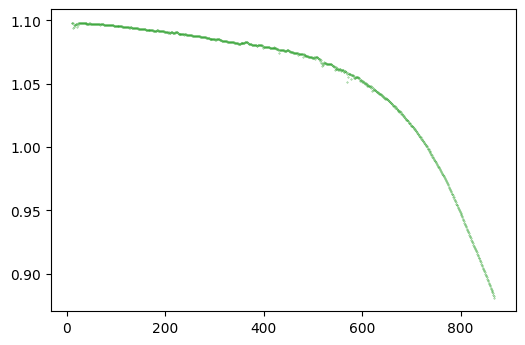

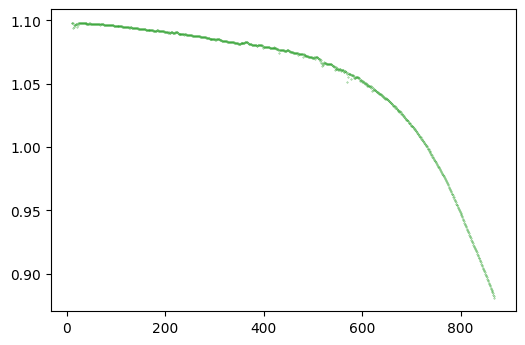

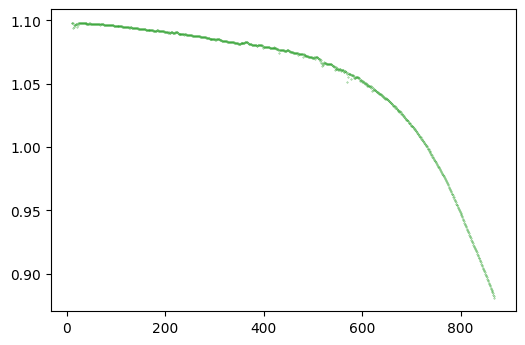

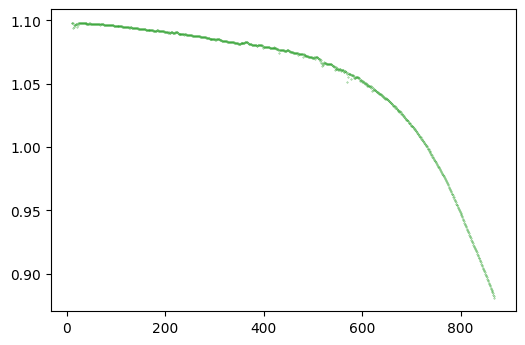

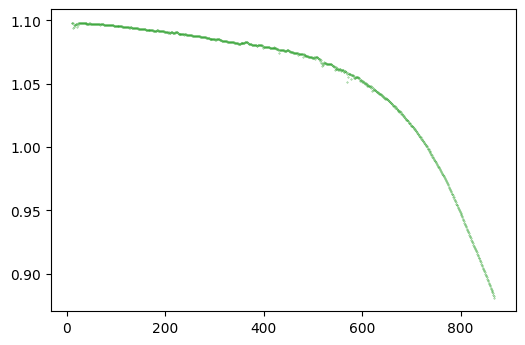

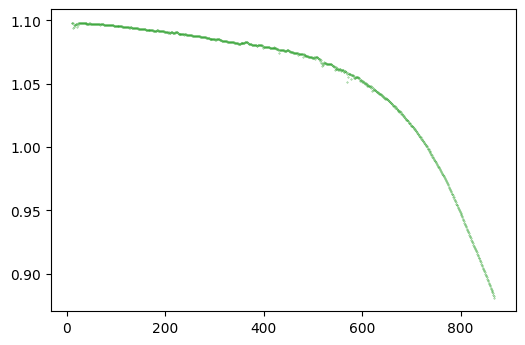

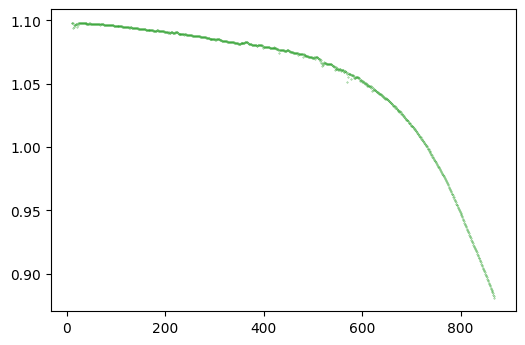

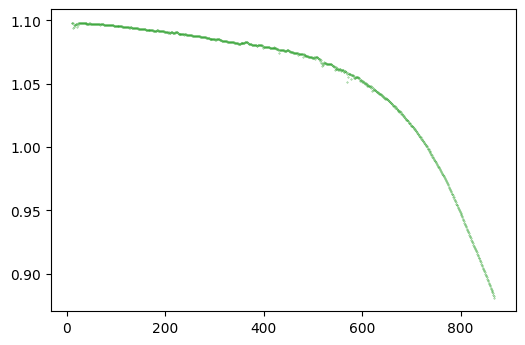

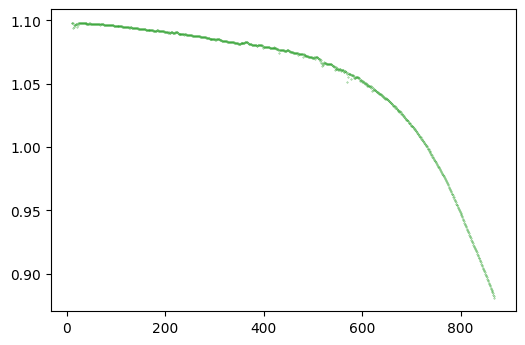

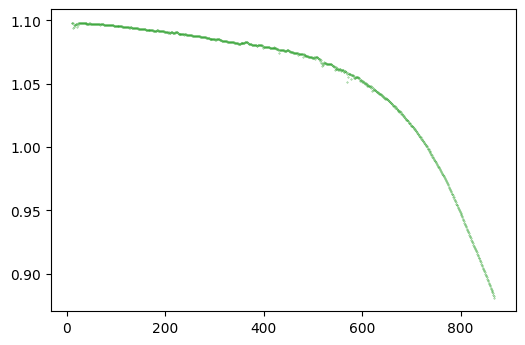

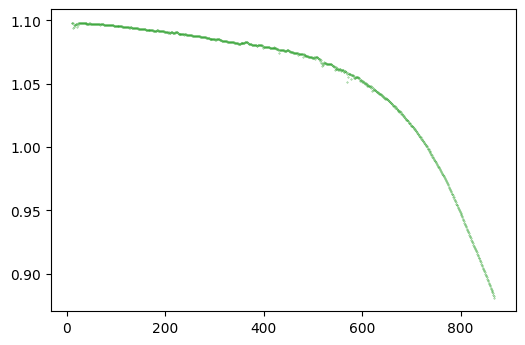

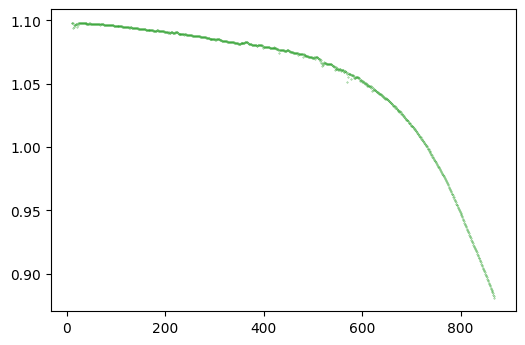

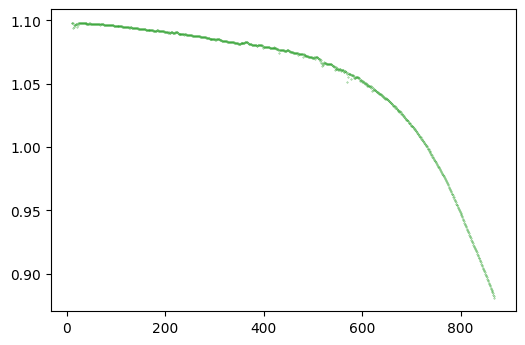

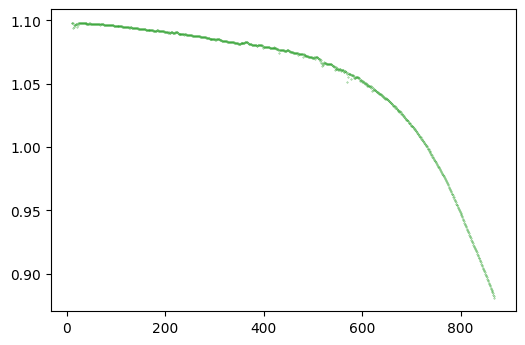

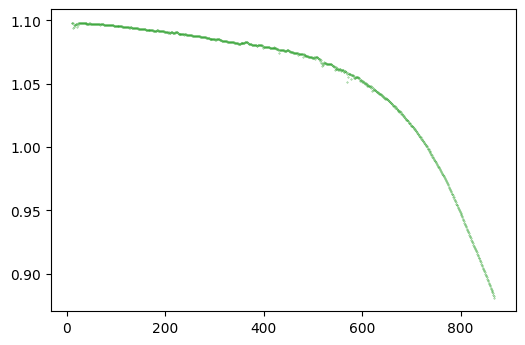

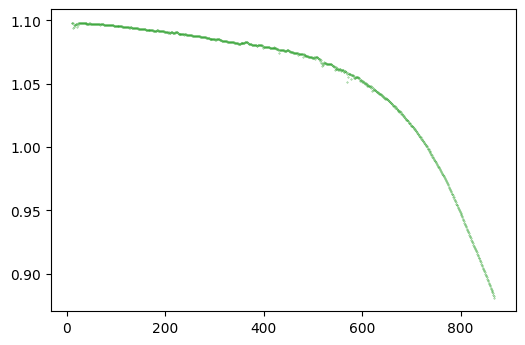

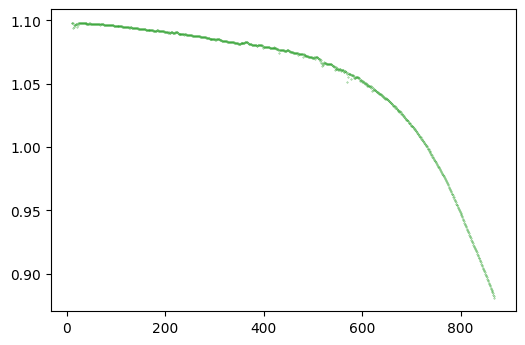

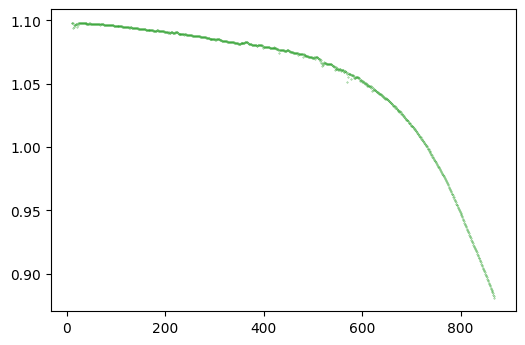

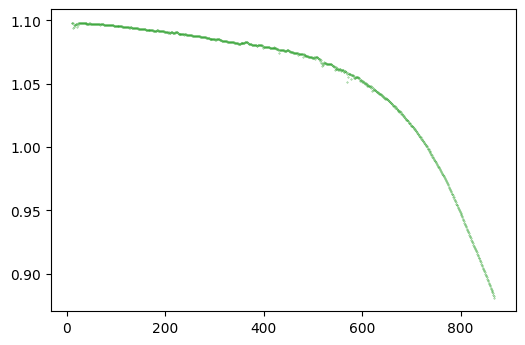

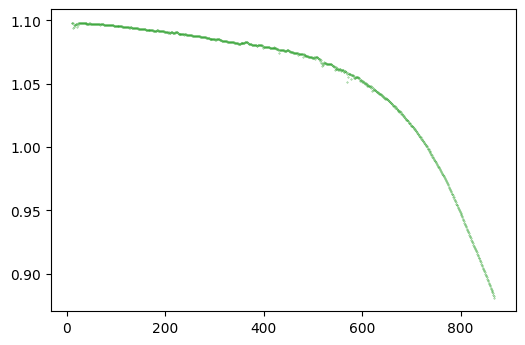

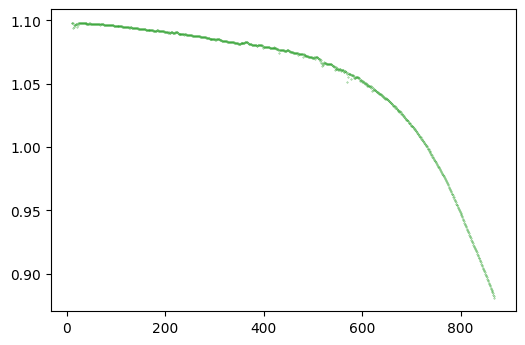

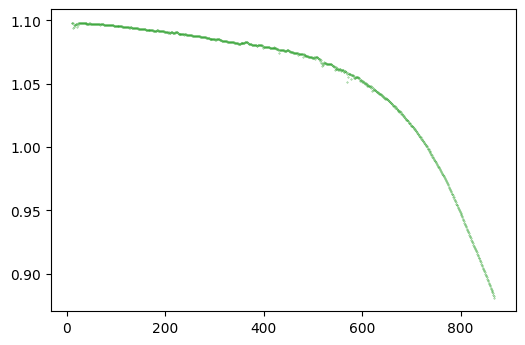

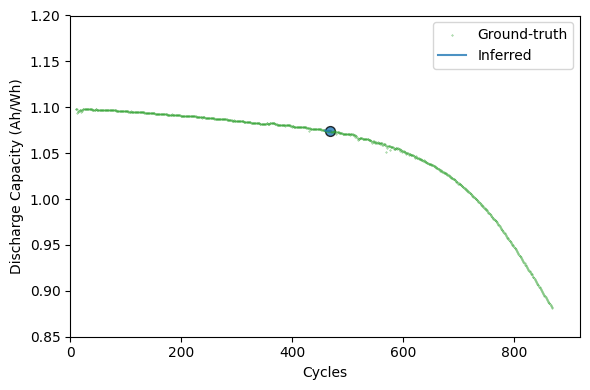

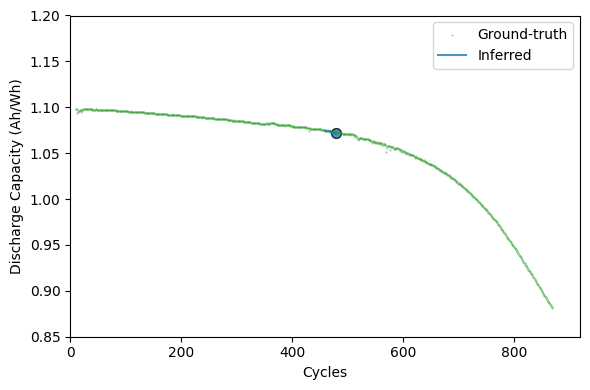

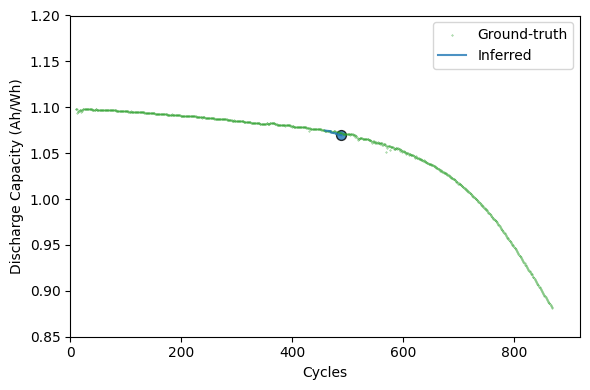

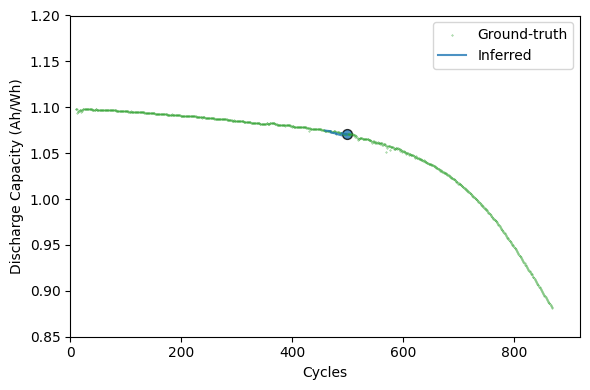

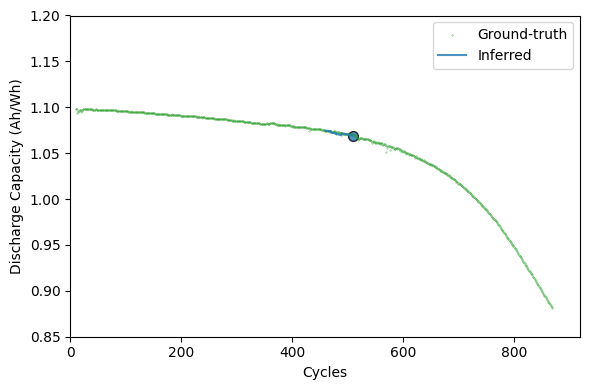

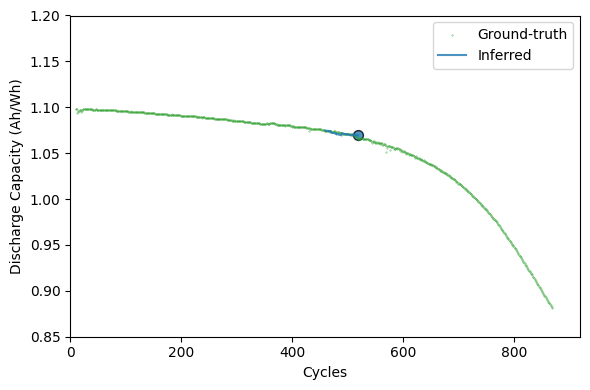

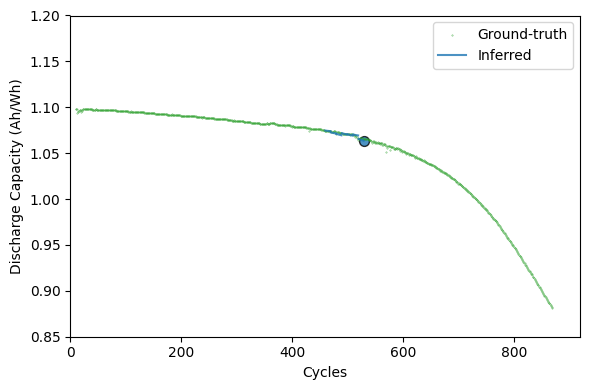

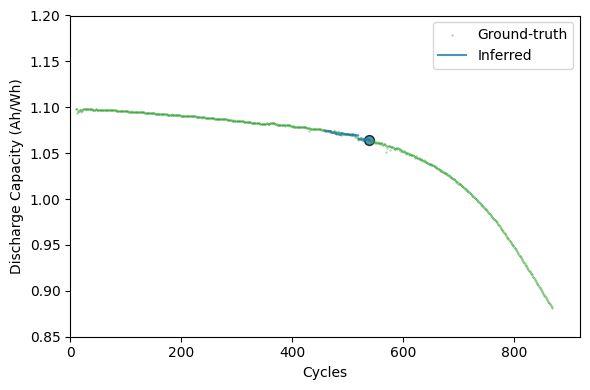

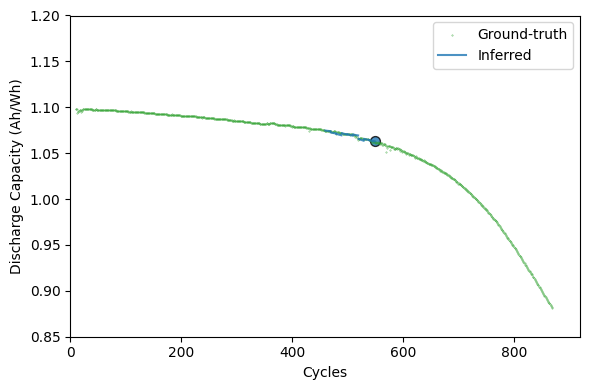

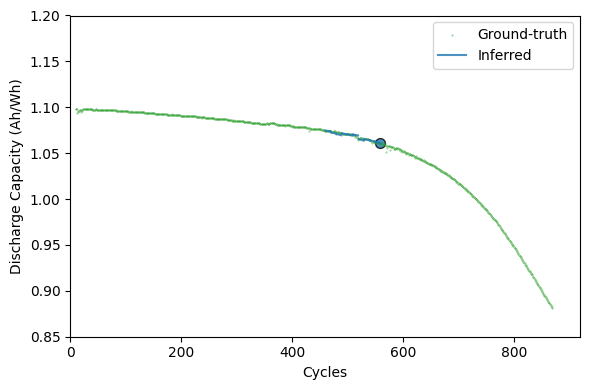

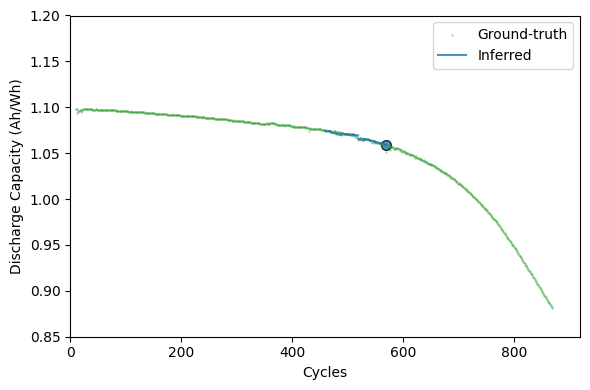

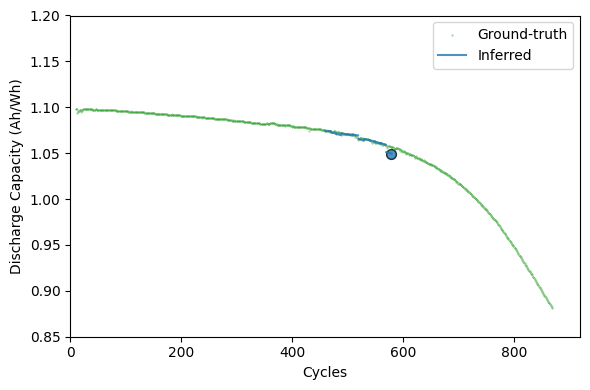

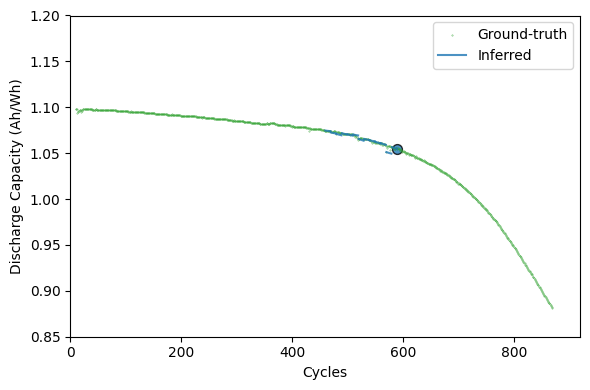

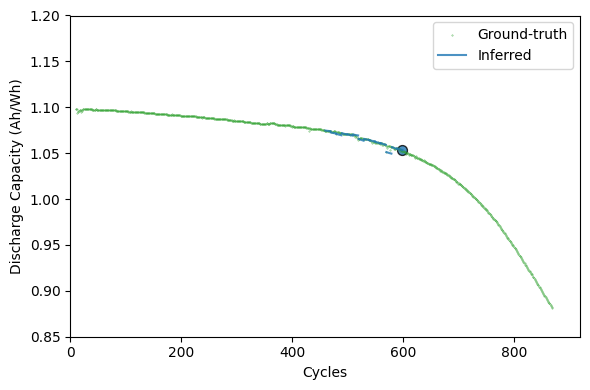

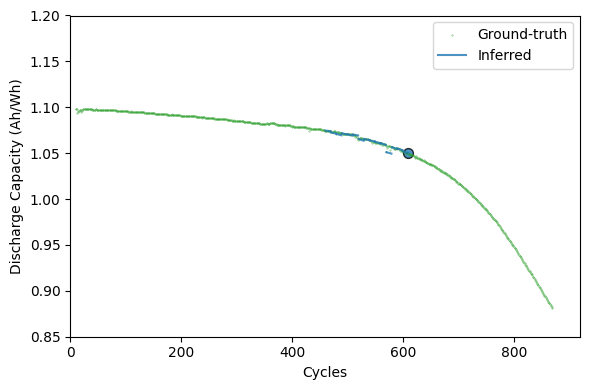

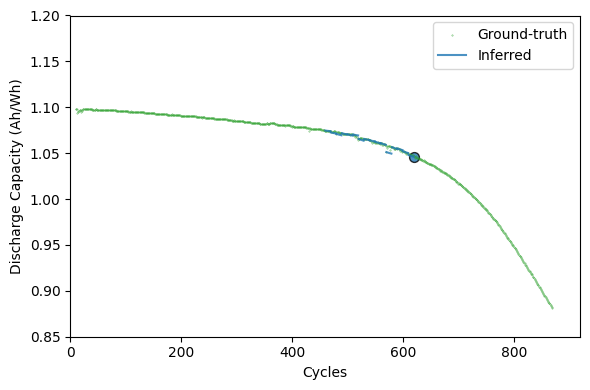

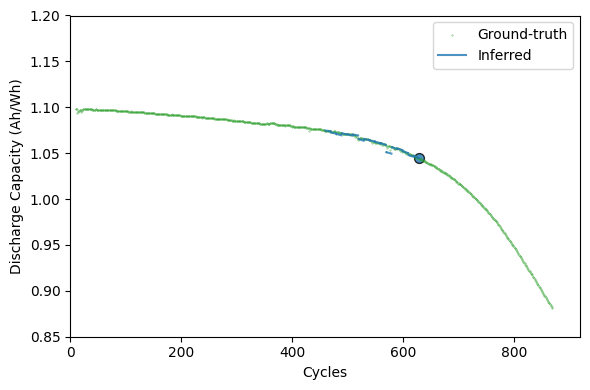

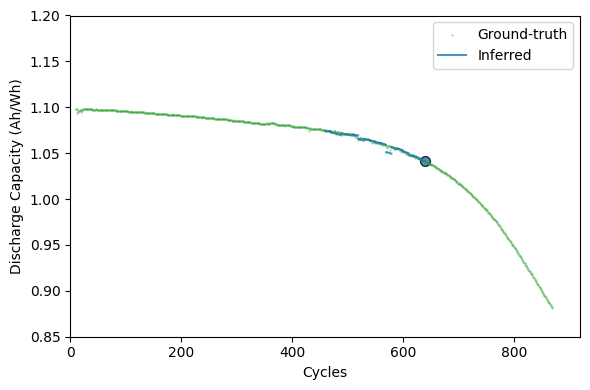

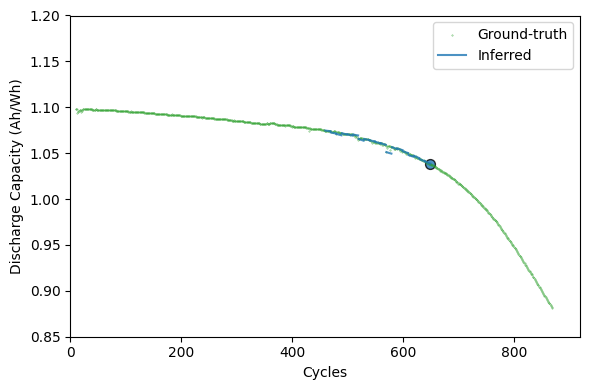

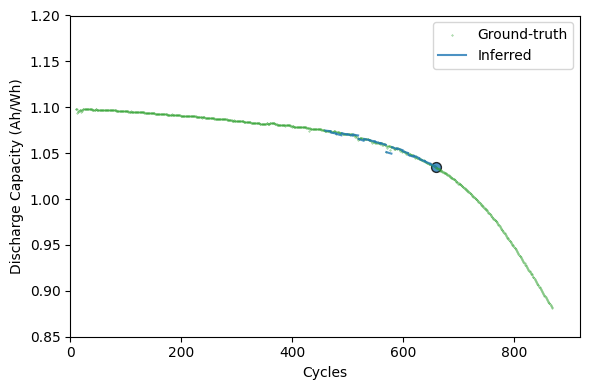

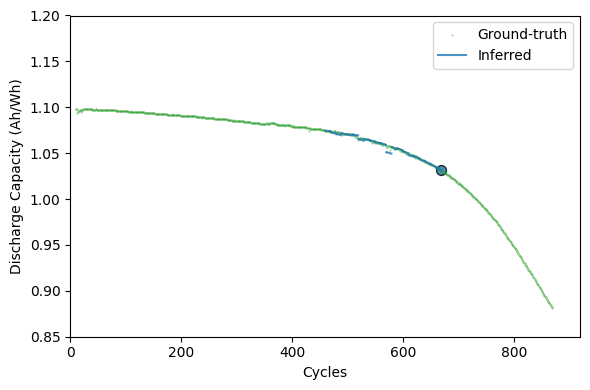

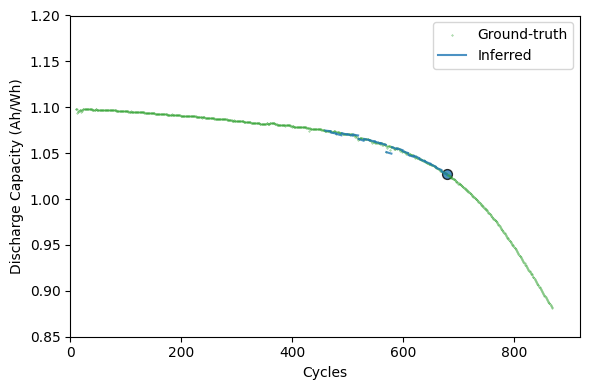

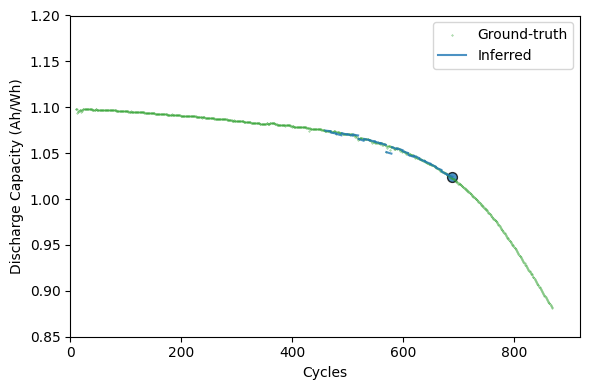

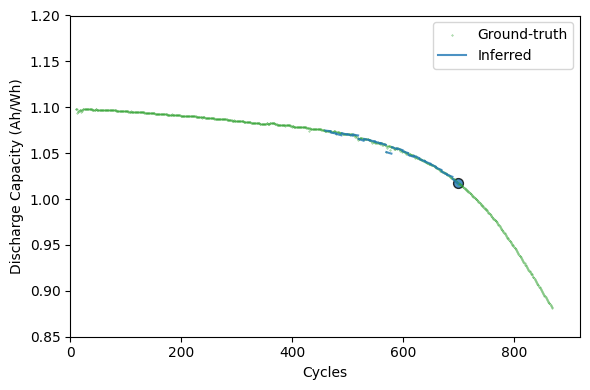

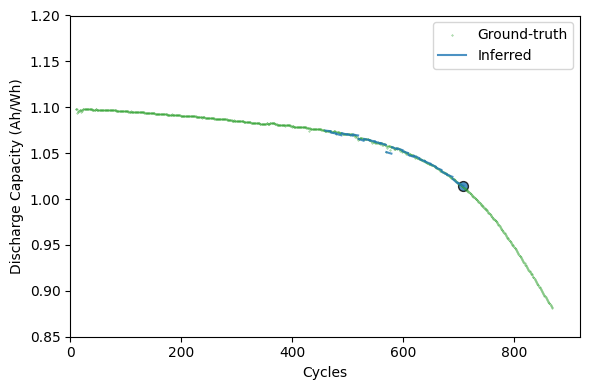

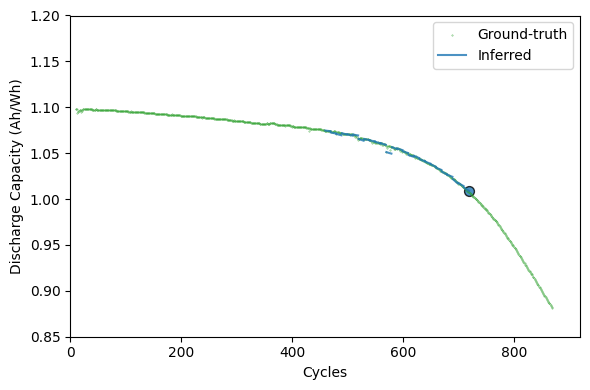

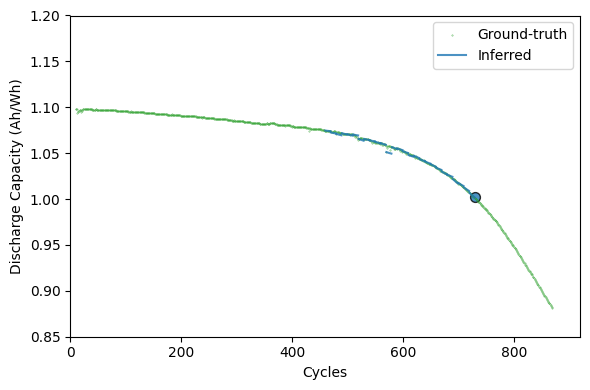

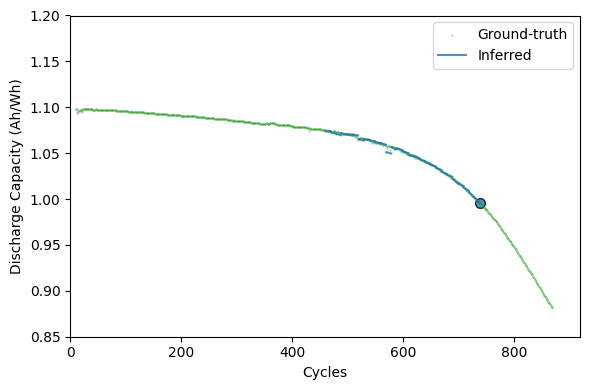

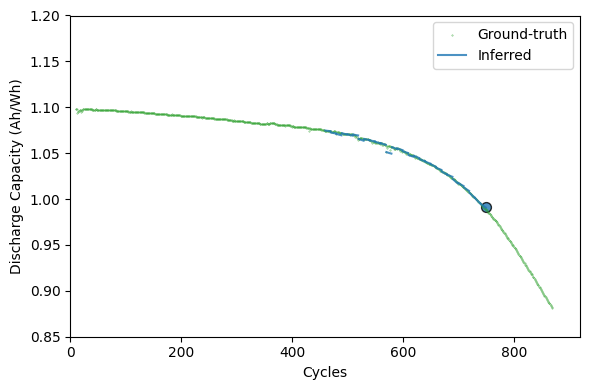

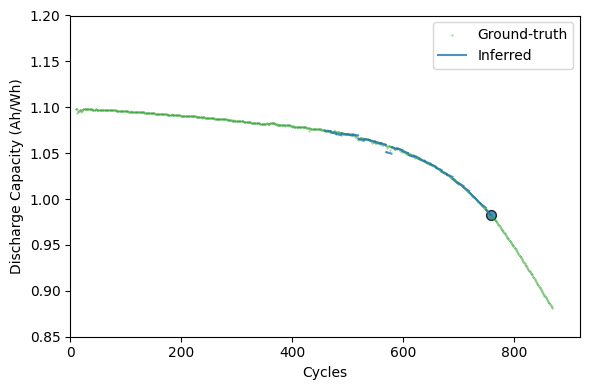

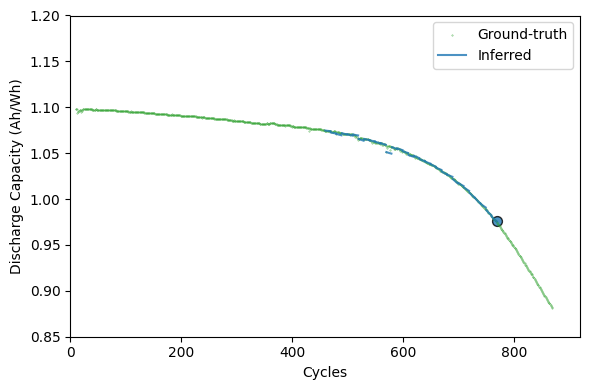

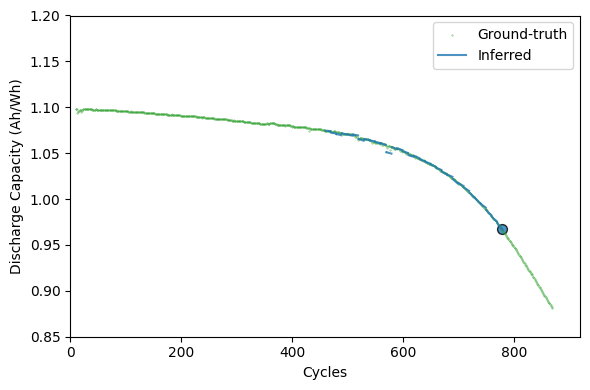

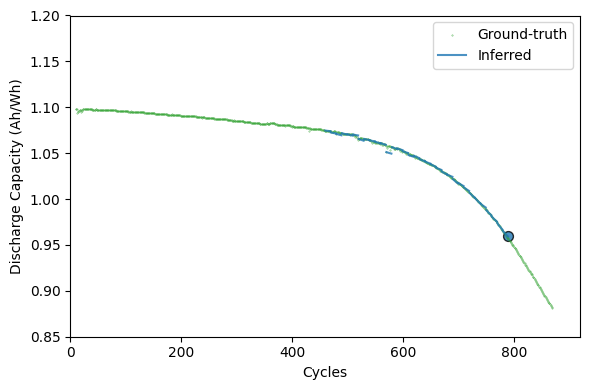

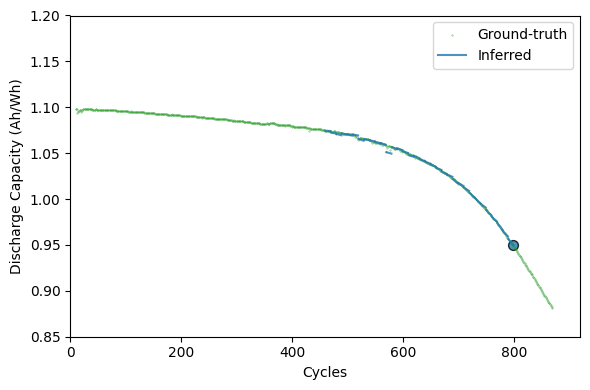

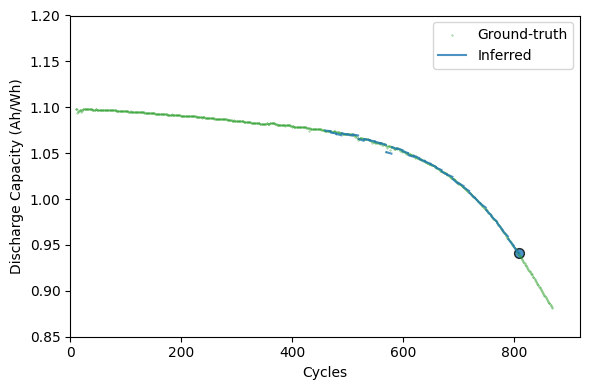

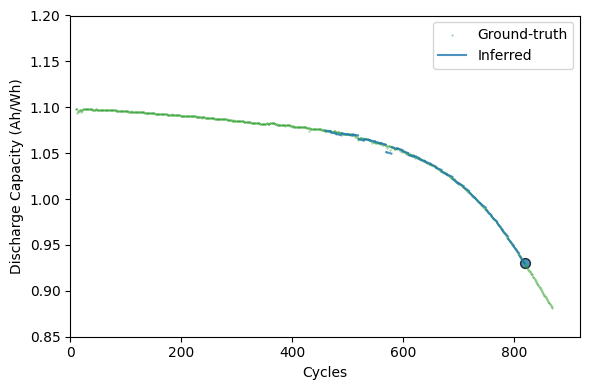

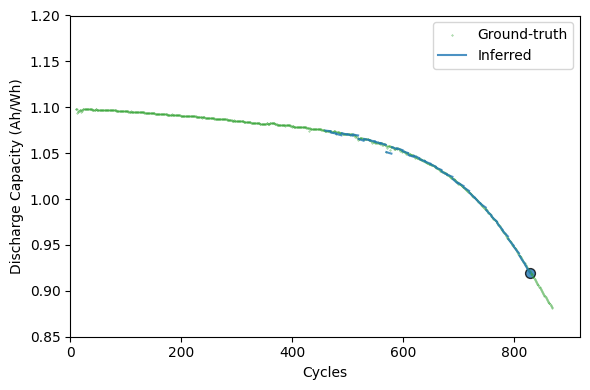

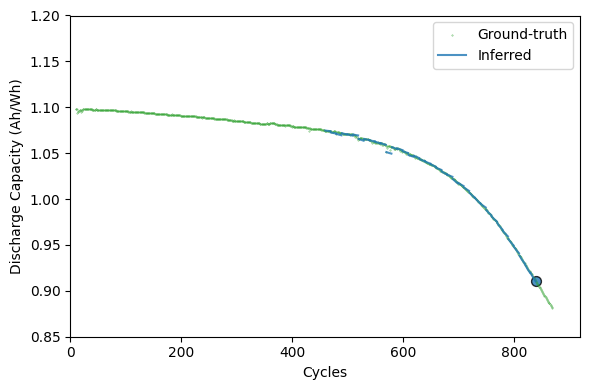

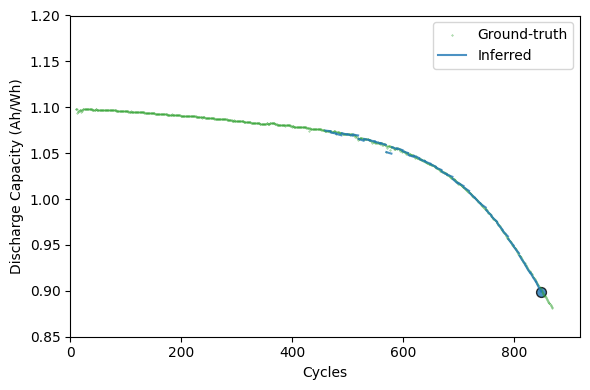

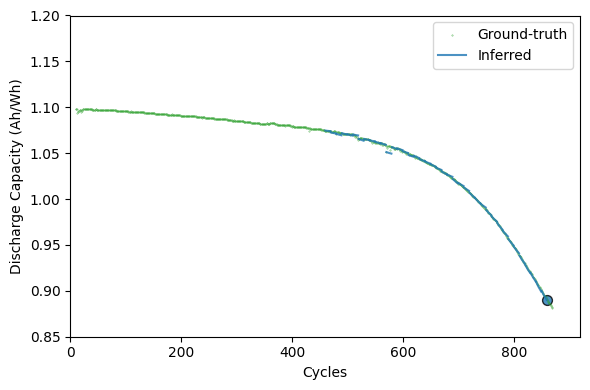

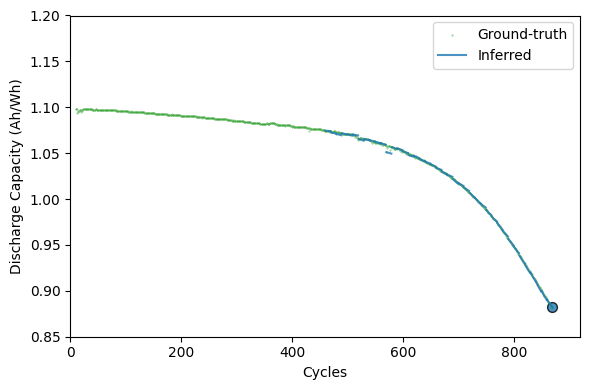

In [204]:
def linear_fit(new_x_point, slope, point_xy):
    return slope*(new_x_point-point_xy[0]) + point_xy[1]

all_predicted_dc_values = []
all_test_dc_values = []
max_cycle_index = all_test_dc.reshape([-1,2])[-1,0]
for i,m in enumerate(all_test_dc):
    plt.figure(dpi=100, facecolor='white')
    plt.scatter(*list(zip(*all_test_dc.reshape([-1,2]))), color = 'C2', s=0.1, label='Ground-truth', alpha=0.8) #if i == 0 else "")
    find_index = np.where(int(m[0,0]) == all_test_dc.reshape([-1,2])[:,0])[0][0]
    mid_dc_in_input_window = all_test_dc.reshape([-1,2])[:,1][find_index] 
    if mid_dc_in_input_window <= cut_off_dc:
        initial_dc = m[0]
        initial_dc = m[0].tolist()

        predicted_dc_values = []

        new_cycle_index = m[0,0]
        for j,slope in enumerate(Y_hat_tested_cell[i]):

            if j == 0 and output_window_size%2==0:
                new_cycle_index = all_test_dc[i][:output_window_size//2,0]
            if j == 0 and output_window_size%2==1:
                new_cycle_index = all_test_dc[i][:output_window_size//2+1,0]
            if j == 1:
                new_cycle_index = all_test_dc[i][output_window_size//2:,0]

    #         print(new_cycle_index)

            new_predicted_dc = linear_fit(new_cycle_index, slope, initial_dc) # slopes_tested_cell[i,j]
            predicted_dc = np.array(list(zip(new_cycle_index , new_predicted_dc)))

            predicted_dc_values.append(predicted_dc)

            initial_dc = predicted_dc[-1]
        all_predicted_dc_values.append(np.array(predicted_dc_values).reshape(-1,2))
        all_test_dc_values.append(np.array(all_test_dc[i]).reshape(-1,2))
        plt.plot(*np.array(all_predicted_dc_values).T, color='C0', label='Inferred', #if i == 0 else "",
                 alpha=0.8)

        plt.scatter(*predicted_dc[-1].T, #if i == 0 else "",
                 marker='o', s=50, edgecolor='k', linewidth=1, facecolor='C0', zorder=-1, alpha=0.8)
        plt.xlabel('Cycles')
        plt.ylabel('Discharge Capacity (Ah/Wh)')
        plt.ylim([0.85,1.2])
        plt.xlim([0 , max_cycle_index+50])
        ax = plt.gca()
        hand, labl = ax.get_legend_handles_labels()
        plt.legend(np.unique(labl))
        plt.tight_layout()
        show_input_output_windows = False
        if show_input_output_windows:
            input_window_cycle_index = [all_test_dc[i][0,0] - output_window_size, all_test_dc[i][0,0]-1]
            input_window_dc = [all_test_dc[i][0, -1], all_test_dc[i][1, -1]]
            input_fill_between = plt.fill_between(*list([input_window_cycle_index, input_window_dc]), alpha=.15,
                                                  edgecolor='y', color='y')
            (x0, y0), (x1, y1) = input_fill_between.get_paths()[0].get_extents().get_points()
            ax.text((x0 + x1) / 2, 0.91*y1, "Input window", ha='center', va='center', fontsize=7, color='y', rotation=90)

            prediction_fill_between = plt.fill_between(*list(zip(*predicted_dc_values)), alpha=.15, edgecolor='C0', color='C0')
            (x0, y0), (x1, y1) = prediction_fill_between.get_paths()[0].get_extents().get_points()
            ax.text((x0 + x1) / 2, 0.91*y1, "Output window", ha='center', va='center', fontsize=7, color='C0', rotation=90)
            save_gif = False
            if save_gif:
                plt.savefig(f'media/LFP/img/discharge_curve_in_{input_window_size}_out_{output_window_size}_window_test_{test_cell_number}_{i:04d}.png', dpi=400, transparent=False)
save_gif = False
# copy last frame
if save_gif:
    for j in range(10):
        os.system(f"cp media/LFP/img/discharge_curve_in_{input_window_size}_out_{output_window_size}_window_test_{test_cell_number}_{i:04d}.png media/LFP/img/discharge_curve_in_{input_window_size}_out_{output_window_size}_window_test_{test_cell_number}_{i+j:04d}.png")
    os.system(f"ffmpeg -framerate 1 -i media/LFP/img/discharge_curve_in_{input_window_size}_out_{output_window_size}_window_test_{test_cell_number}_%04d.png -c:v h264 -crf 14 -c:v libx264 -movflags +faststart -vf format=yuv420p -maxrate 50M -tune animation -bufsize 1MB -t 15 -y media/LFP/mp4/discharge_curve_in_{input_window_size}_out{output_window_size}_window_test_{test_cell_number}.mp4")
    os.system(f'ffmpeg -i media/LFP/mp4/discharge_curve_in_{input_window_size}_out{output_window_size}_window_test_{test_cell_number}.mp4 -framerate 1 -vf "fps=24, scale=2000:-1:flags=lanczos" -loop 0 -y media/LFP/gif/discharge_curve_in_{input_window_size}_out{output_window_size}_window_test_{test_cell_number}.gif')
# ffmpeg -i discharge_curve_50_window_test_3.mp4 -r 40 -vf "fps=20, scale=2000:-1:flags=lanczos" -f image2pipe -vcodec ppm - | convert -delay 10 -loop 0 - test.gif
# [[10.0, 1.0798281], [34.5, 1.079974232453665], [59.0, 1.0797930195017356]]

In [205]:
def eval_dc_reconstruction(predicted_dc, ground_truth_dc):
    # remove duplicates
    unique_keys, p_indices = np.unique(predicted_dc[:,0], return_index=True)
    unique_keys, g_indices = np.unique(ground_truth_dc[:,0], return_index=True)
    return np.sqrt(((predicted_dc[p_indices][:,1] - ground_truth_dc[g_indices][:,1]) ** 2).mean())

dc_rmse = eval_dc_reconstruction(np.array(all_predicted_dc_values).reshape(-1,2),np.array(all_test_dc_values).reshape([-1,2]))
dict_results = {'input_window_size':input_window_size,
                'prediction_window_size':output_window_size,
                'test_slope_MAE':slope_mae,
                'test_dc_RMSE': dc_rmse
               }
dict_results

{'input_window_size': 10,
 'prediction_window_size': 10,
 'test_slope_MAE': 0.12908399105072021,
 'test_dc_RMSE': 0.001359565077424494}

In [206]:
test_predicted = np.array(all_predicted_dc_values).reshape(-1,2)
test_predicted.shape
test_ground_truth =  all_test_dc.reshape([-1,2])
unique_test, g_indices = np.unique(test_ground_truth[:,0], return_index=True)

In [207]:
unique_test, indices = np.unique(test_predicted[:,0], return_index=True)
unique_test.shape

(410,)

In [208]:
import pandas as pd
import json
# input_window_sizes = [10,25,50,75, 100]
input_window_sizes = [10, 25, 50, 75, 100]

output_window_sizes = [10,25,50,75, 100, 125, 150, 175, 200]

all_RMSE = []
for m in input_window_sizes:
    for n in output_window_sizes:
        input_window_size = m
        output_window_size = n
        RMSE_file = f'../paper/CACHED_DATA/DNN/LFP/RMSE_test/cut_off_0.02/RMSE_test_cells_{input_window_size}_outputs_window_{output_window_size}.json'
        with open(RMSE_file) as json_file:
            data = json.load(json_file)
        all_RMSE.append(data)
df = pd.json_normalize(all_RMSE)

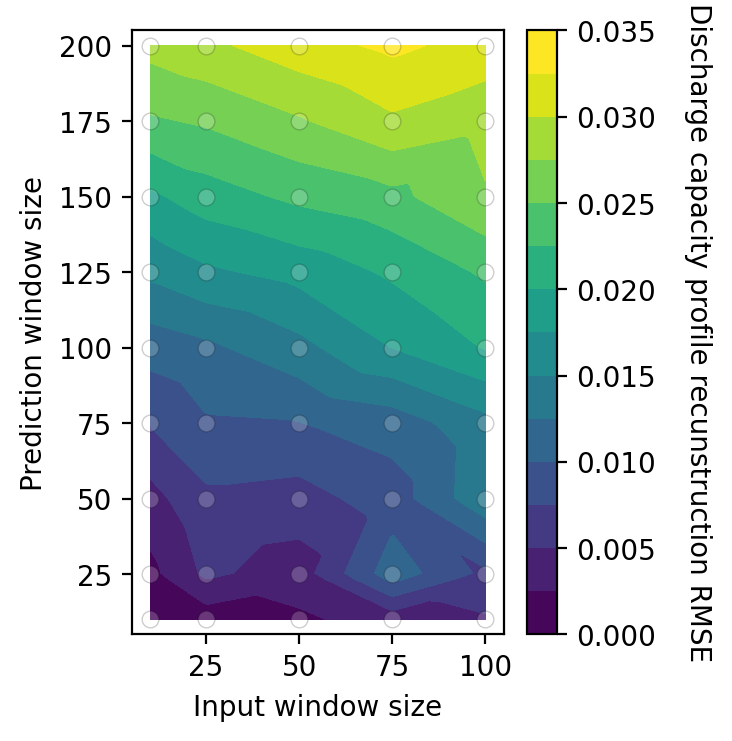

In [214]:
import pandas as pd
input_window_sizes = [10,25,50,75, 100]
output_window_sizes = [10,25,50,75, 100, 125, 150, 175, 200]

all_RMSE = []
for m in input_window_sizes:
    for n in output_window_sizes:
        input_window_size = m
        output_window_size = n
        RMSE_file = f'../paper/CACHED_DATA/naive_model/LFP/cut_off_0.02/RMSE_test_cells_{input_window_size}_outputs_window_{output_window_size}.json'
        with open(RMSE_file) as json_file:
            data = json.load(json_file)
        all_RMSE.append(data)

naive_df = pd.json_normalize(all_RMSE)

vmin = min(naive_df['RMSE dc test cells'].min(), df['RMSE dc test cells'].min())
vmax = max(naive_df['RMSE dc test cells'].max(), df['RMSE dc test cells'].max())
alpha = 0.2

import scipy.stats as sps
xmin = 10
xmax = 100
ymin = 10
ymax = 200
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
fig, ax = plt.subplots(figsize=(3,4),dpi=200)

from scipy.interpolate import griddata
npts = 15
px, py = np.random.choice(naive_df['Input Window Size'], npts), np.random.choice(naive_df['Output Window Size'], npts)
Ti = griddata((naive_df['Input Window Size'], naive_df['Output Window Size']),naive_df['RMSE dc test cells'], (X, Y), method='linear')
im = ax.contourf(X, Y, Ti, levels=npts, vmin=vmin, vmax=vmax)

sns.scatterplot(
    data=naive_df,
    x=naive_df['Input Window Size'], y=naive_df['Output Window Size'],
#     size=df['RMSE dc test cells']
    ax=ax,
    color='white',
    edgecolor='k',
    alpha=alpha
)

cbar = fig.colorbar(im, orientation='vertical')
# cbar.set_label('RMSE', rotation=0, y=1.02, x=-1)
cbar.set_label('Discharge capacity profile recunstruction RMSE', rotation=270, labelpad=20)

ax.set_xlabel('Input window size')
ax.set_ylabel('Prediction window size')
ax.set_xlim([xmin-5, xmax+5])
ax.set_ylim([ymin-5, ymax+5])
# plt.savefig(f'../paper/CACHED_DATA/naive_model/LFP/cut_off_0.02/img/naive_model_RMSE_cut_off_0.02.svg', dpi=400, transparent=False, bbox_inches='tight')

<Figure size 1200x800 with 0 Axes>

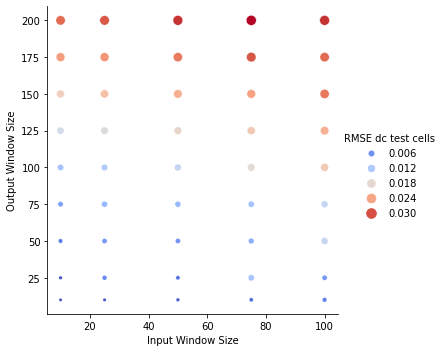

In [210]:
import seaborn as sns
plt.figure(dpi=200)
sns.relplot(
    data=naive_df,
    x='Input Window Size', y='Output Window Size',
    size='RMSE dc test cells', sizes=(10, 100),
    hue='RMSE dc test cells',
    palette='coolwarm',
)

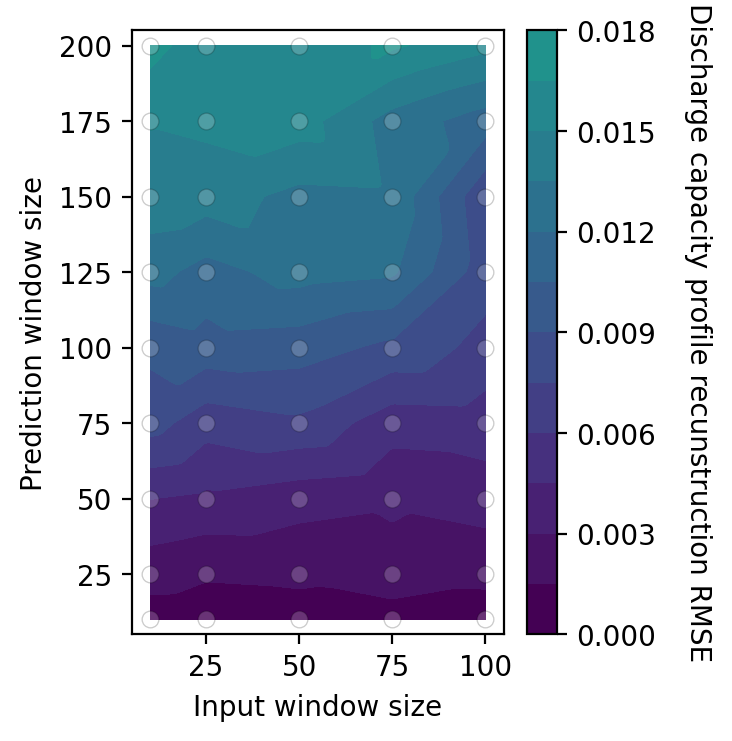

In [217]:
import scipy.stats as sps
xmin = 10
xmax = 100
ymin = 10
ymax = 200
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
fig, ax = plt.subplots(dpi=200, figsize=(3,4))

from scipy.interpolate import griddata
# npts = 1000
px, py = np.random.choice(df['Input Window Size'], npts), np.random.choice(df['Output Window Size'], npts)
Ti = griddata((df['Input Window Size'], df['Output Window Size']),df['RMSE dc test cells'], (X, Y), method='linear')
im = ax.contourf(X, Y, Ti, levels=npts, vmin=vmin, vmax=vmax)

sns.scatterplot(
    data=df,
    x=df['Input Window Size'], y=df['Output Window Size'],
#     size=df['RMSE dc test cells']
    ax=ax,
    color='white',
    edgecolor='k',
    alpha = alpha
)

cbar = fig.colorbar( im, orientation='vertical')
cbar.set_label('Discharge capacity profile recunstruction RMSE', rotation=270, labelpad=20)
ax.set_xlabel('Input window size')
ax.set_ylabel('Prediction window size')
ax.set_xlim([xmin-5, xmax+5])
ax.set_ylim([ymin-5, ymax+5])
plt.savefig(f'../paper/CACHED_DATA/DNN/LFP/img/DNN_RMSE_cut_off_0.02.svg', dpi=400, transparent=False, bbox_inches='tight')